<a href="https://colab.research.google.com/github/xlr8r53/Stock-Market-Prediction-/blob/main/projaapl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('AAPL.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515212,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526477,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422665,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410791,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800
...,...,...,...,...,...,...,...
3229,2022-10-31,153.160004,154.240005,151.919998,153.339996,153.086044,97943200
3230,2022-11-01,155.080002,155.449997,149.130005,150.649994,150.400497,80379300
3231,2022-11-02,148.949997,152.169998,145.000000,145.029999,144.789810,93604600
3232,2022-11-03,142.059998,142.800003,138.750000,138.880005,138.650009,97918500


In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1

0         7.643214
1         7.656429
2         7.534643
3         7.520714
4         7.570714
           ...    
3229    153.339996
3230    150.649994
3231    145.029999
3232    138.880005
3233    138.380005
Name: Close, Length: 3234, dtype: float64

Text(0, 0.5, 'Closing stock price($)')

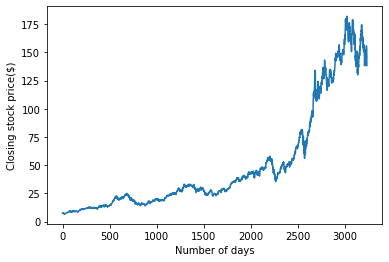

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.xlabel("Number of days")
plt.ylabel("Closing stock price($)")

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.00447776]
 [0.00455321]
 [0.00385789]
 ...
 [0.78886799]
 [0.75375548]
 [0.7509008 ]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(2102, 1132)

In [ ]:
train_data

array([[0.00447776],
       [0.00455321],
       [0.00385789],
       ...,
       [0.22512607],
       [0.22639641],
       [0.22826622]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(2001, 100)
(2001,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(1031, 100)
(1031,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
32/32 [==============================] - 14s 235ms/step - loss: 0.0017 - val_loss: 0.0059
Epoch 2/100
32/32 [==============================] - 6s 192ms/step - loss: 7.2247e-05 - val_loss: 0.0016
Epoch 3/100
32/32 [==============================] - 9s 296ms/step - loss: 4.2971e-05 - val_loss: 0.0026
Epoch 4/100
32/32 [==============================] - 8s 235ms/step - loss: 4.0574e-05 - val_loss: 0.0025
Epoch 5/100
32/32 [==============================] - 7s 211ms/step - loss: 3.9784e-05 - val_loss: 0.0031
Epoch 6/100
32/32 [==============================] - 6s 201ms/step - loss: 3.9207e-05 - val_loss: 0.0034
Epoch 7/100
32/32 [==============================] - 6s 199ms/step - loss: 3.7840e-05 - val_loss: 0.0043
Epoch 8/100
32/32 [==============================] - 7s 213ms/step - loss: 3.8844e-05 - val_loss: 0.0042
Epoch 9/100
32/32 [==============================] - 6s 196ms/step - loss: 3.7465e-05 - val_loss: 0.0033
Epoch 10/100
32/32 [==============================] - 6s 1

In [ ]:
import tensorflow as tf
tf.__version__

'2.9.2'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

33/33 [==============================] - 1s 33ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

25.88104074680834

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

115.58070637256476

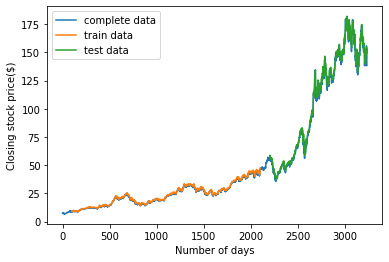

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1),label ='complete data')
plt.plot(trainPredictPlot,label ='train data')
plt.plot(testPredictPlot,label ='test data')
plt.xlabel("Number of days")
plt.ylabel("Closing stock price($)")
plt.legend()
plt.show()

In [ ]:
len(test_data)

1132

In [ ]:
x_input=test_data[781:].reshape(1,-1)
x_input.shape

(1, 351)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.7132760699269738,
 0.7056827047801124,
 0.7161878991932598,
 0.7257795793261115,
 0.7241809650190767,
 0.722525291396171,
 0.7208124671076794,
 0.7303470822153031,
 0.739196603005545,
 0.7427935265892129,
 0.7445634101935754,
 0.7599215981934131,
 0.7716828569002256,
 0.7862417348918675,
 0.778648278395291,
 0.7893247535244803,
 0.785842039922269,
 0.792350701422508,
 0.8123905166526362,
 0.8085652587464125,
 0.7966327193235581,
 0.7741378405313273,
 0.795262445048436,
 0.7909804271473859,
 0.7989735786135608,
 0.8090220187412391,
 0.8114770823033415,
 0.7988023036068761,
 0.7885825085415124,
 0.792350701422508,
 0.7936067714255304,
 0.791665607105126,
 0.8021708072276306,
 0.7998299479376276,
 0.800457982939139,
 0.795205380023208,
 0.7949198950350664,
 0.7921223670999524,
 0.7936067714255304,
 0.8109061123270582,
 0.8121051173048526,
 0.8236379560487515,
 0.8183282938169498,
 0.7964614500262306,
 0.7984026086372775,
 0.8069095794141496,
 0.8155878309070639,
 0.8150739202466515,
 0

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=350
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,-1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.7056827  0.7161879  0.72577958 0.72418097 0.72252529 0.72081247
 0.73034708 0.7391966  0.74279353 0.74456341 0.7599216  0.77168286
 0.78624173 0.77864828 0.78932475 0.78584204 0.7923507  0.81239052
 0.80856526 0.79663272 0.77413784 0.79526245 0.79098043 0.79897358
 0.80902202 0.81147708 0.7988023  0.78858251 0.7923507  0.79360677
 0.79166561 0.80217081 0.79982995 0.80045798 0.79520538 0.7949199
 0.79212237 0.79360677 0.81090611 0.81210512 0.82363796 0.81832829
 0.79646145 0.79840261 0.80690958 0.81558783 0.81507392 0.80788016
 0.80319845 0.80925044 0.83505667 0.82769164 0.83157396 0.83808262
 0.84179376 0.85543912 0.84641833 0.84048063 0.81136287 0.81467431
 0.80650988 0.81170542 0.81033514 0.79474863 0.77693545 0.77973299
 0.79354971 0.79914485 0.79965867 0.79080915 0.77105483 0.77630742
 0.76871397 0.77527969 0.75523988 0.76648732 0.77156865 0.77893368
 0.77670703 0.77619321 0.76877103 0.76534547 0.78161709 0.7877832
 0.79754624 0.81016387 0.81301855 0.81427462 0.80976

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

3234

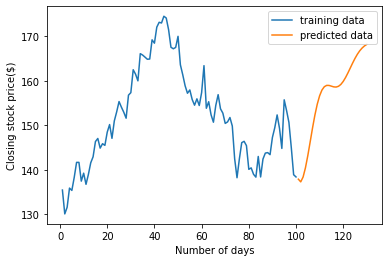

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[3134:]),label='training data')
plt.plot(day_pred,scaler.inverse_transform(lst_output),label='predicted data')
plt.xlabel("Number of days")
plt.ylabel("Closing stock price($)")
plt.legend()

Text(0, 0.5, 'Closing stock price($)')

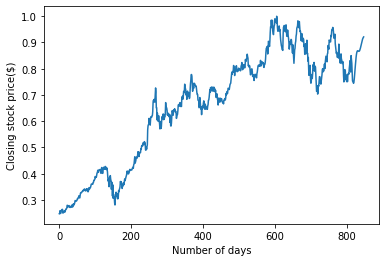

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2416:])
plt.xlabel("Number of days")
plt.ylabel("Closing stock price($)")
plt.legend()

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

Text(0, 0.5, 'Closing stock price($)')

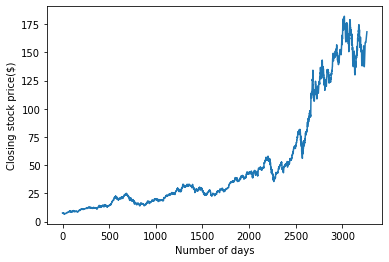

In [ ]:
plt.plot(df3)
plt.xlabel("Number of days")
plt.ylabel("Closing stock price($)")